# Lung Cancer Prediction

## 1. Import Library

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import joblib

## 2. Data Wrangling

### 2.a. Gathering Data

In [31]:
lung_cancer_df = pd.read_csv('./data/lung_cancer.csv', engine='python')
lung_cancer_df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### 2.b. Assessing Data

#### 2.b.1. Check Data Types

In [32]:
lung_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

#### 2.b.2 Check Descriptive Statistic

In [33]:
lung_cancer_df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


#### 2.b.3 Check Null

In [34]:
lung_cancer_df.isnull().any()

index                       False
Patient Id                  False
Age                         False
Gender                      False
Air Pollution               False
Alcohol use                 False
Dust Allergy                False
OccuPational Hazards        False
Genetic Risk                False
chronic Lung Disease        False
Balanced Diet               False
Obesity                     False
Smoking                     False
Passive Smoker              False
Chest Pain                  False
Coughing of Blood           False
Fatigue                     False
Weight Loss                 False
Shortness of Breath         False
Wheezing                    False
Swallowing Difficulty       False
Clubbing of Finger Nails    False
Frequent Cold               False
Dry Cough                   False
Snoring                     False
Level                       False
dtype: bool

#### 2.b.4 Check Duplicate

In [35]:
duplicate_mask = lung_cancer_df.duplicated()
duplicates = lung_cancer_df[duplicate_mask]
print(duplicates)

Empty DataFrame
Columns: [index, Patient Id, Age, Gender, Air Pollution, Alcohol use, Dust Allergy, OccuPational Hazards, Genetic Risk, chronic Lung Disease, Balanced Diet, Obesity, Smoking, Passive Smoker, Chest Pain, Coughing of Blood, Fatigue, Weight Loss, Shortness of Breath, Wheezing, Swallowing Difficulty, Clubbing of Finger Nails, Frequent Cold, Dry Cough, Snoring, Level]
Index: []

[0 rows x 26 columns]


### 2.c. Cleaning Data

#### 2.c.1 Drop Column `Index` and `Patient ID`

In [36]:
lung_cancer_df.columns.tolist()

['index',
 'Patient Id',
 'Age',
 'Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring',
 'Level']

In [37]:
col=['index','Patient Id']
lung_cancer_df.drop(columns=col,inplace=True,axis=1)

#### 2.c.2 Encoding Column `Label`

In [38]:
lung_cancer_df['Level'] = lung_cancer_df['Level'].apply(lambda x: 1 if x=='Low' else 2 if x=='Medium' else 3)

## 3. Exploratory Data Analysis & Data Visualization

### 3.a Explore Column `Level`

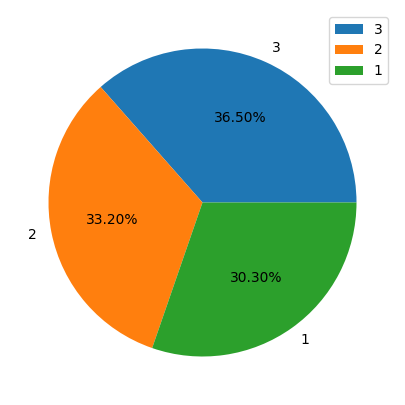

In [39]:
tdf=lung_cancer_df['Level'].value_counts().reset_index()
plt.figure(figsize=(15,5))
plt.pie(x=tdf['count'],labels=tdf['Level'],autopct='%.2f%%')
plt.legend(tdf['Level'])
plt.show()

### 3.b Correlation Heat Map

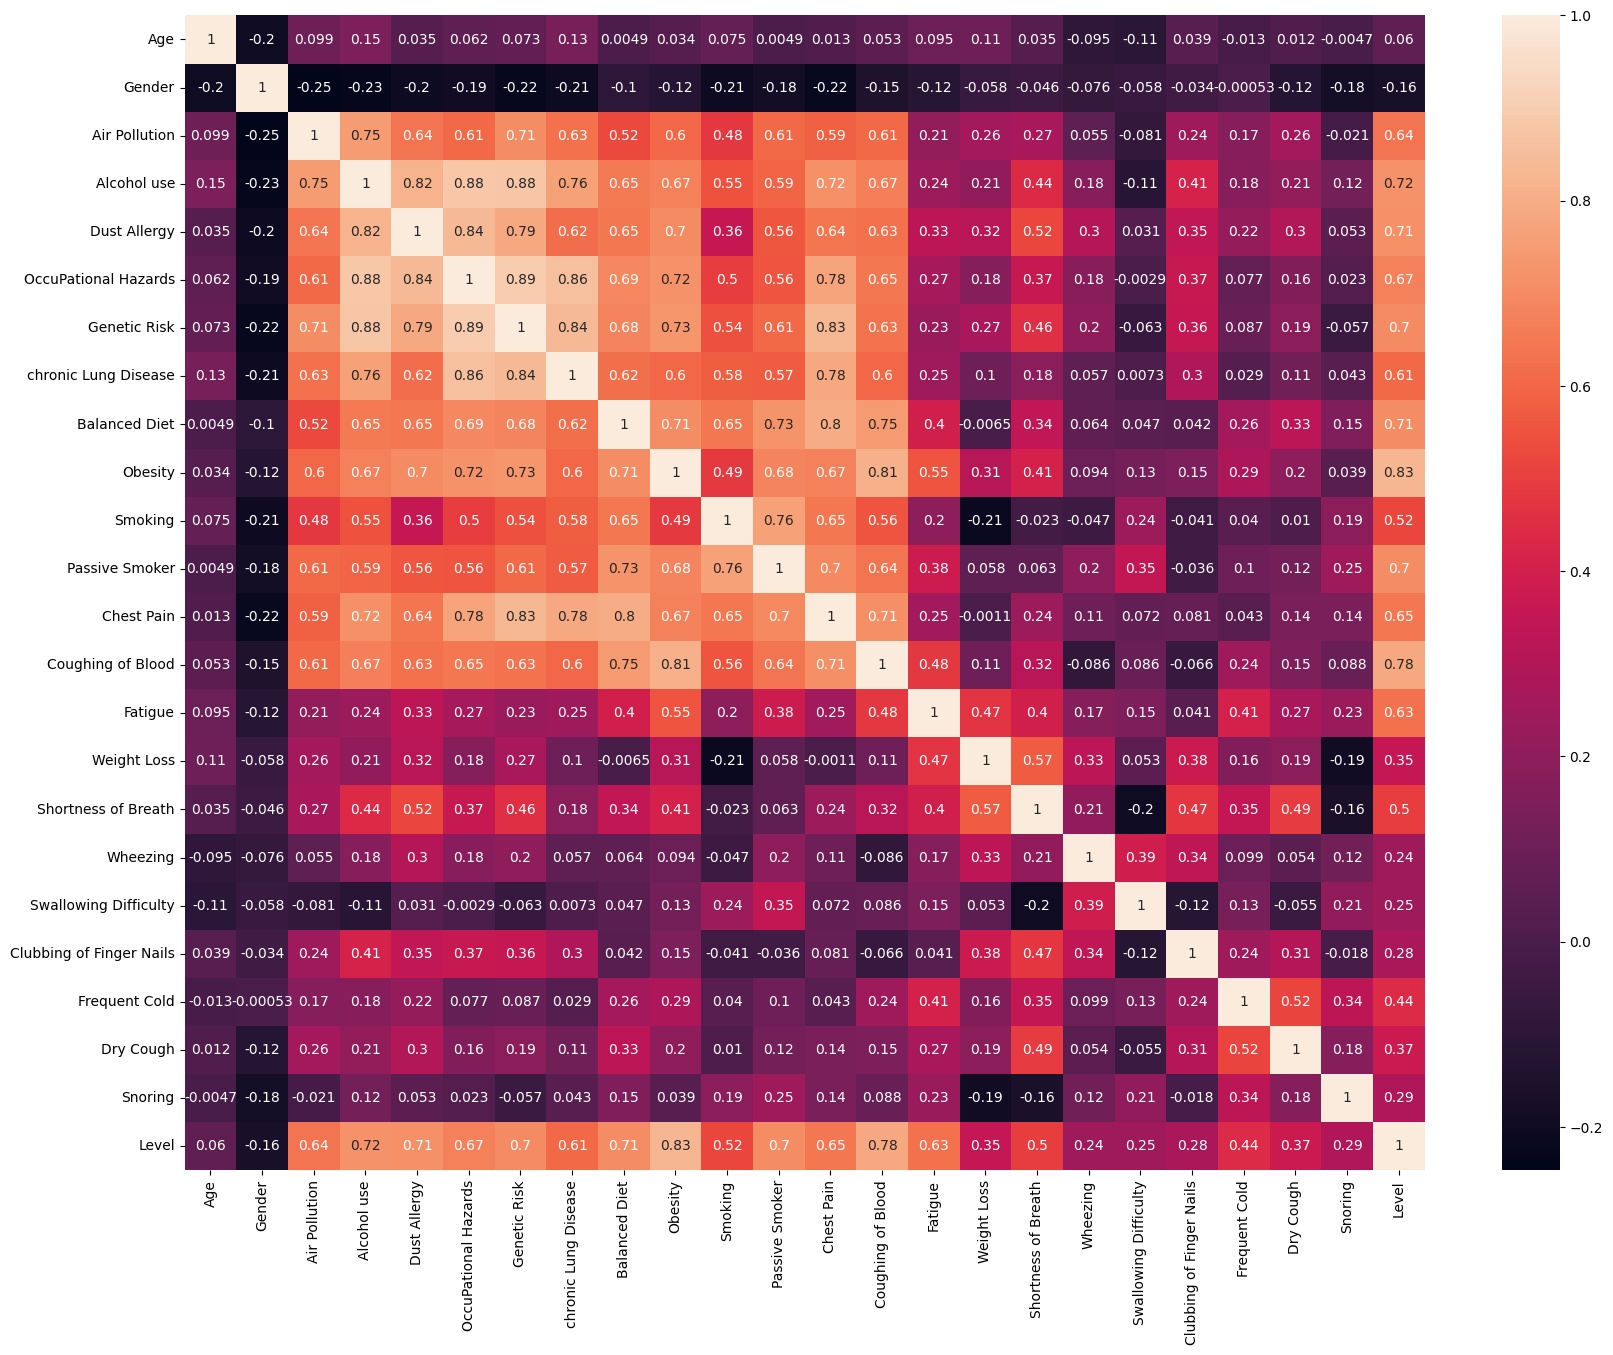

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(lung_cancer_df.corr(),annot=True,cbar='magma')
plt.show()

In [41]:
row_to_analyze = lung_cancer_df.corr().loc['Level']
sorted_correlation_df = row_to_analyze.sort_values(ascending=False).reset_index()
sorted_correlation_df.columns = ['Feature', 'Correlation']
sorted_correlation_df = sorted_correlation_df.iloc[1:-1]
print(sorted_correlation_df)

                     Feature  Correlation
1                    Obesity     0.827435
2          Coughing of Blood     0.782092
3                Alcohol use     0.718710
4               Dust Allergy     0.713839
5              Balanced Diet     0.706273
6             Passive Smoker     0.703594
7               Genetic Risk     0.701303
8       OccuPational Hazards     0.673255
9                 Chest Pain     0.645461
10             Air Pollution     0.636038
11                   Fatigue     0.625114
12      chronic Lung Disease     0.609971
13                   Smoking     0.519530
14       Shortness of Breath     0.497024
15             Frequent Cold     0.444017
16                 Dry Cough     0.373968
17               Weight Loss     0.352738
18                   Snoring     0.289366
19  Clubbing of Finger Nails     0.280063
20     Swallowing Difficulty     0.249142
21                  Wheezing     0.242794
22                       Age     0.060048


In [42]:
# x=lung_cancer_df.drop(columns='Level')
# y=lung_cancer_df['Level']

# from sklearn.feature_selection import mutual_info_classif
# mi=mutual_info_classif(x,y)
# mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
# mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
# print(mi_df)

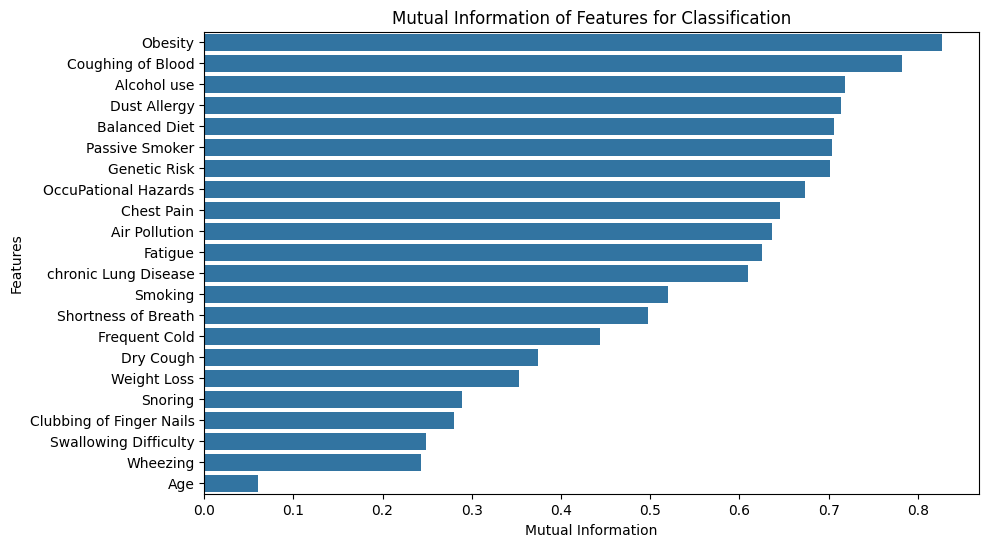

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='Correlation',y='Feature', data=sorted_correlation_df)
plt.title('Mutual Information of Features for Classification')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

## 4. Model

In [44]:
X = lung_cancer_df[['Obesity', 'Coughing of Blood', 'Alcohol use', 'Dust Allergy', 'Balanced Diet', 'Passive Smoker', 'Genetic Risk', 'OccuPational Hazards', 'Chest Pain', 'Air Pollution', 'Fatigue', 'chronic Lung Disease']]
# X = lung_cancer_df.drop(columns='Level')
y = lung_cancer_df['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.09856981453436896
R-squared: 0.852169300687085


In [45]:
# model accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.852169300687085


In [46]:
joblib.dump(model, './model/lung_cancer.pkl')

['./model/lung_cancer.pkl']